# File Startup

In [ ]:
#imports
from google.colab import files
import pandas as pd
import numpy as np

In [ ]:
combined_df = pd.read_csv('/content/combined_df.csv', dtype={'CENSUS_TRACT': str})
print(combined_df.head())

# Drop rows with NaN values (excluding NaN only in 'Median Income')
combined_df = combined_df.dropna(subset=combined_df.columns.difference(['Median Income']))
# Select rows with NaN in any column except 'Median Income'
nan_rows = combined_df[combined_df.drop(columns=['Median Income'], errors='ignore').isnull().any(axis=1)]

# Print the selected rows
print(nan_rows)


  CENSUS_TRACT    Total:      Bicycle  % Bike Commuter  Num_Crashes     COUNT  \
0  06075010101  0.210996     0.086614         0.224949     0.818182  0.205128   
1  06075017903  0.254324     0.041339         0.089071     0.000000  0.128205   
2  06075016802  0.496268     0.078740         0.086946     0.545455  0.282051   
3  06075020202  0.505735     0.718504         0.778532     0.636364  0.794872   
4  06075016101  0.176588     0.009843         0.030543     0.090909  0.025641   

   BIKE SIGNAL: 0  TWO-STAGE LEFT: 1  INTERSECTION SHARROW: 2  BIKE BOX: 3  \
0        0.166667                0.2                 0.263158          0.0   
1        0.000000                0.0                 0.105263          0.2   
2        0.000000                0.2                 0.368421          0.6   
3        0.000000                0.8                 1.000000          1.0   
4        0.000000                0.0                 0.000000          0.2   

   MIXING ZONE: 4  PAINTED SAFETY ZONE: 5  C

# Exploratory Regression Plots- % Bike Commuter and 1 bike network feature


In [ ]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

independent_variables = ['% Bike Commuter',
       'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
       'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
       'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
       'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
       'JUGHANDLE: 11']
dependent_variables = [ 'Num_Crashes']

for dv in dependent_variables:
    for iv1 in independent_variables:
        for iv2 in independent_variables:
            # Skip regressions where dependent and independent variables are the same
            if dv == iv1 or dv == iv2 or iv1 == iv2:
                continue

            # Define the formula, replacing spaces and % with underscores
            # using patsy's Q function to handle special characters
            formula = f'Q("{dv}") ~ Q("{iv1}") + Q("{iv2}") + Q("{iv1}"):Q("{iv2}")'

            # Run the regression
            model = smf.ols(formula, data=combined_df).fit()

            # Print the results
            print(f'Regression for {dv} with {iv1}, {iv2}, and interaction:')
            print(model.summary())
            print('---')


Regression for Num_Crashes with % Bike Commuter, BIKE SIGNAL: 0, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     15.55
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.84e-09
Time:                        05:25:53   Log-Likelihood:                 110.43
No. Observations:                 243   AIC:                            -212.9
Df Residuals:                     239   BIC:                            -198.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with BIKE SIGNAL: 0, INTERSECTION SHARROW: 2, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     57.07
Date:                Mon, 12 May 2025   Prob (F-statistic):           7.44e-28
Time:                        05:25:53   Log-Likelihood:                 154.39
No. Observations:                 243   AIC:                            -300.8
Df Residuals:                     239   BIC:                            -286.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with TWO-STAGE LEFT: 1, PAINTED SAFETY ZONE: 5, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.43e-23
Time:                        05:25:53   Log-Likelihood:                 139.34
No. Observations:                 243   AIC:                            -274.7
Df Residuals:                     241   BIC:                            -267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with INTERSECTION SHARROW: 2, PROTECTED INTERSECTION: 9, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     159.3
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.26e-28
Time:                        05:25:54   Log-Likelihood:                 150.41
No. Observations:                 243   AIC:                            -296.8
Df Residuals:                     241   BIC:                            -289.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with BIKE BOX: 3, JUGHANDLE: 11, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     36.15
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.90e-14
Time:                        05:25:54   Log-Likelihood:                 120.75
No. Observations:                 243   AIC:                            -235.5
Df Residuals:                     240   BIC:                            -225.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     5.395
Date:                Mon, 12 May 2025   Prob (F-statistic):             0.0210
Time:                        05:25:54   Log-Likelihood:                 91.450
No. Observations:                 243   AIC:                            -178.9
Df Residuals:                     241   BIC:                            -171.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with PROTECTED CORNER: 7, MIXING ZONE: 4, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     14.43
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.13e-08
Time:                        05:25:54   Log-Likelihood:                 108.99
No. Observations:                 243   AIC:                            -210.0
Df Residuals:                     239   BIC:                            -196.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with PROTECTED INTERSECTION: 9, CROSSBIKE: 6, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.357
Date:                Mon, 12 May 2025   Prob (F-statistic):             0.0682
Time:                        05:25:55   Log-Likelihood:                 90.440
No. Observations:                 243   AIC:                            -176.9
Df Residuals:                     241   BIC:                            -169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 12 May 2025   Prob (F-statistic):                nan
Time:                        05:25:55   Log-Likelihood:                 88.760
No. Observations:                 243   AIC:                            -175.5
Df Residuals:                     242   BIC:                            -172.0
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

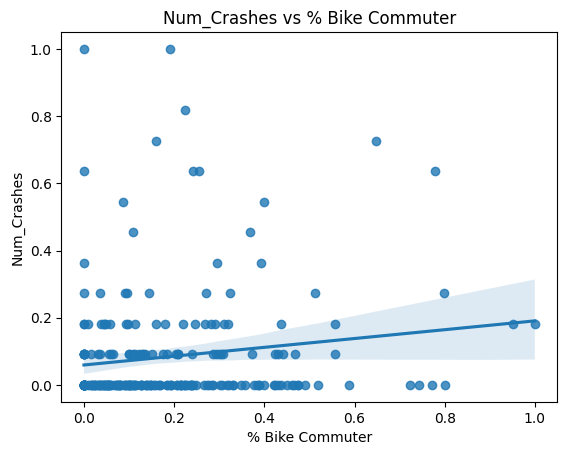

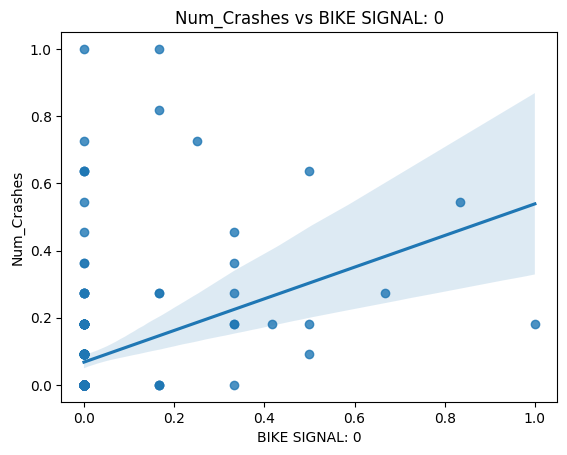

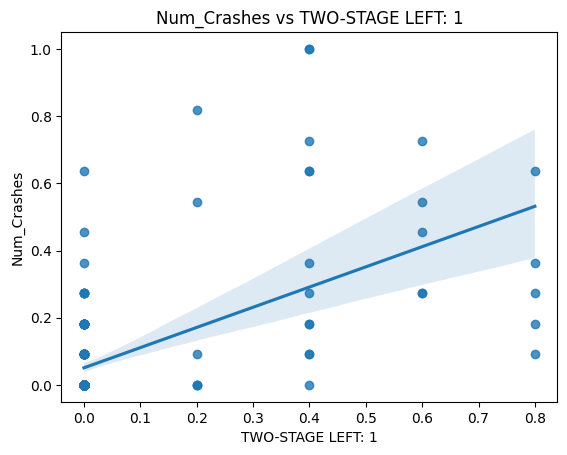

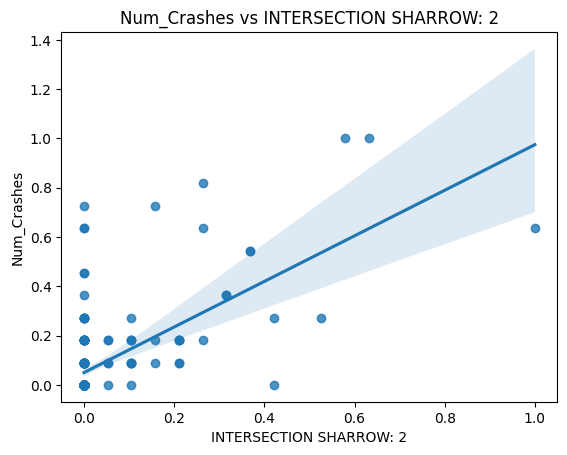

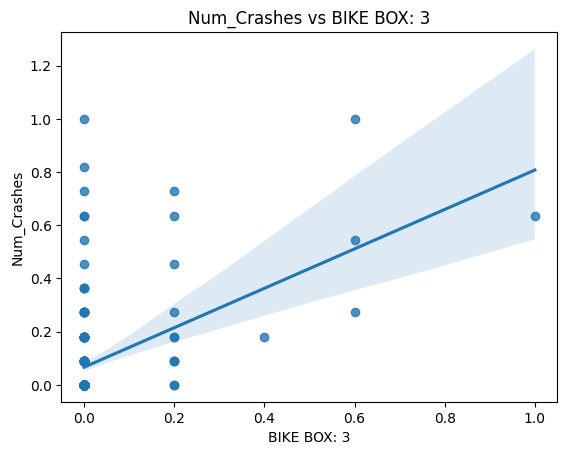

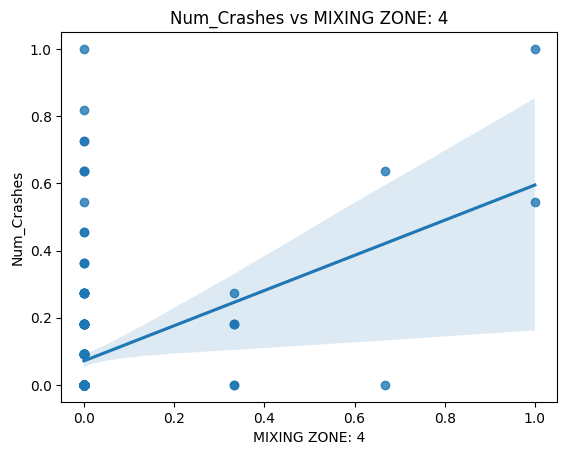

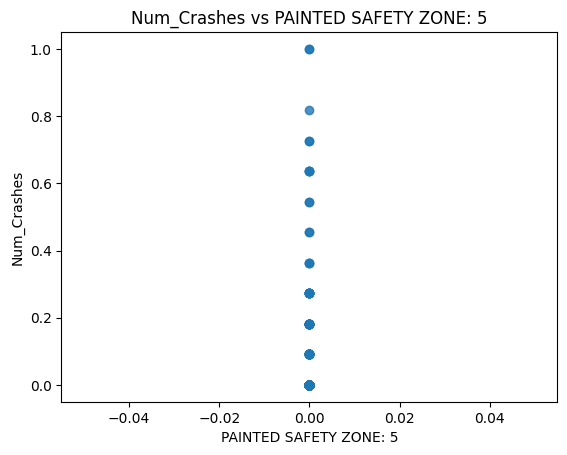

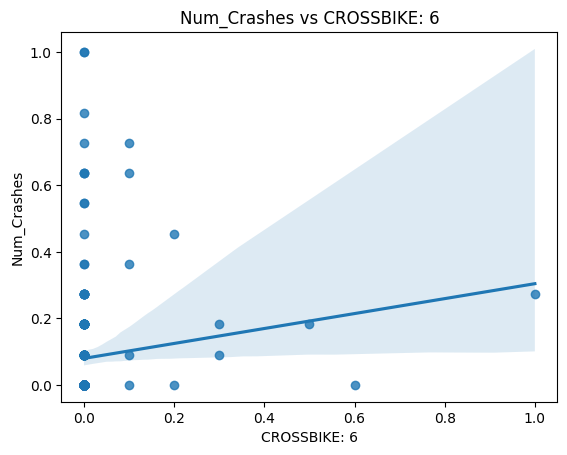

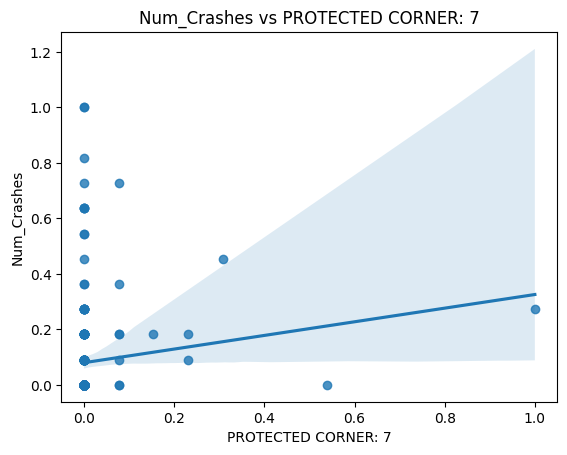

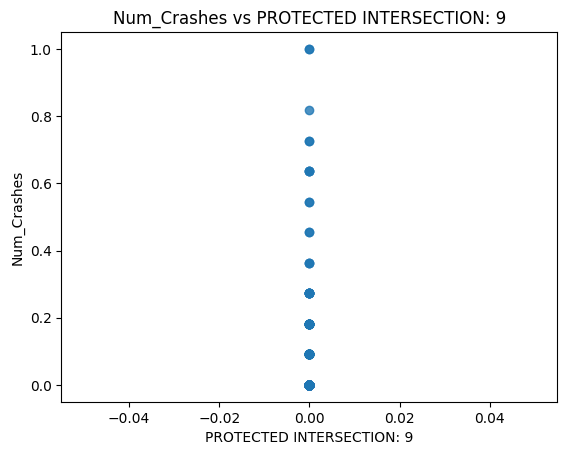

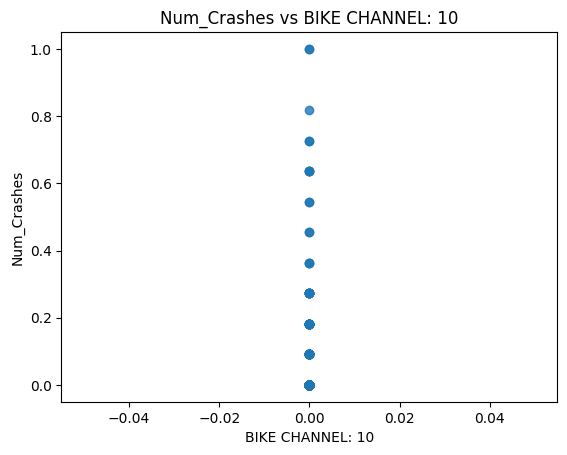

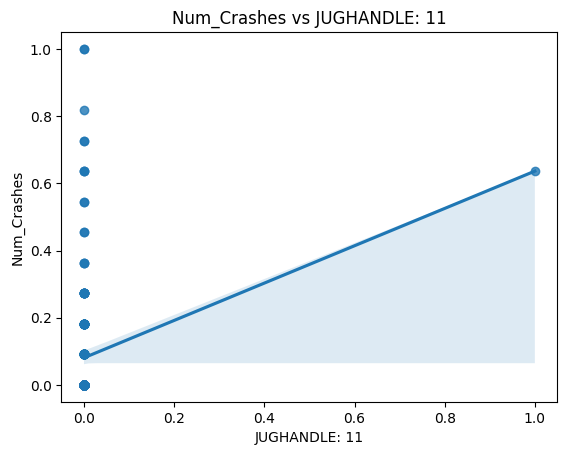

In [ ]:
for iv in independent_variables:
  # Create a scatter plot with regression line
  # Access the column directly using its name
  sns.regplot(x=iv, y=dependent_variables[0], data=combined_df)  # Access the column name from the list
  plt.title(f'{dependent_variables[0]} vs {iv}')  # Use the column name in the title
  plt.xlabel(iv)
  plt.ylabel(dependent_variables[0])  # Use the column name for the y-axis label
  plt.show() # Display the plot


# Exploratory Regression Plots- Coupled Bike Features

In [ ]:
import statsmodels.formula.api as smf

independent_variables = ['BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11'
                       ]
dependent_variables = ['Num_Crashes']

for dv in dependent_variables:
    for iv1 in independent_variables:
        for iv2 in independent_variables:
            # Skip regressions where dependent and independent variables are the same
            # or where iv1 and iv2 are the same
            if dv == iv1 or dv == iv2 or iv1 == iv2:
                continue

            # Define the formula
            formula = f'Q("{dv}") ~ Q("{iv1}") + Q("{iv2}") + Q("{iv1}"):Q("{iv2}")'

            # Run the regression
            model = smf.ols(formula, data=combined_df).fit()

            # Print the results
            print(f'Regression for {dv} with {iv1}, {iv2}, and interaction:')
            print(model.summary())
            print('---')

Regression for Num_Crashes with BIKE SIGNAL: 0, TWO-STAGE LEFT: 1, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     56.73
Date:                Mon, 12 May 2025   Prob (F-statistic):           9.92e-28
Time:                        05:25:59   Log-Likelihood:                 154.10
No. Observations:                 243   AIC:                            -300.2
Df Residuals:                     239   BIC:                            -286.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with TWO-STAGE LEFT: 1, PAINTED SAFETY ZONE: 5, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.43e-23
Time:                        05:25:59   Log-Likelihood:                 139.34
No. Observations:                 243   AIC:                            -274.7
Df Residuals:                     241   BIC:                            -267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     57.22
Date:                Mon, 12 May 2025   Prob (F-statistic):           6.51e-28
Time:                        05:25:59   Log-Likelihood:                 154.53
No. Observations:                 243   AIC:                            -301.1
Df Residuals:                     239   BIC:                            -287.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with MIXING ZONE: 4, TWO-STAGE LEFT: 1, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.54e-23
Time:                        05:26:00   Log-Likelihood:                 143.37
No. Observations:                 243   AIC:                            -278.7
Df Residuals:                     239   BIC:                            -264.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with PAINTED SAFETY ZONE: 5, CROSSBIKE: 6, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.357
Date:                Mon, 12 May 2025   Prob (F-statistic):             0.0682
Time:                        05:26:00   Log-Likelihood:                 90.440
No. Observations:                 243   AIC:                            -176.9
Df Residuals:                     241   BIC:                            -169.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


Regression for Num_Crashes with CROSSBIKE: 6, JUGHANDLE: 11, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     7.543
Date:                Mon, 12 May 2025   Prob (F-statistic):           0.000665
Time:                        05:26:00   Log-Likelihood:                 96.167
No. Observations:                 243   AIC:                            -186.3
Df Residuals:                     240   BIC:                            -175.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with PROTECTED INTERSECTION: 9, TWO-STAGE LEFT: 1, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     124.4
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.43e-23
Time:                        05:26:00   Log-Likelihood:                 139.34
No. Observations:                 243   AIC:                            -274.7
Df Residuals:                     241   BIC:                            -267.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

Regression for Num_Crashes with BIKE CHANNEL: 10, MIXING ZONE: 4, and interaction:
                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     38.40
Date:                Mon, 12 May 2025   Prob (F-statistic):           2.48e-09
Time:                        05:26:00   Log-Likelihood:                 106.72
No. Observations:                 243   AIC:                            -209.4
Df Residuals:                     241   BIC:                            -202.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_

# Exploratory Regression Plots- Median Income, % Bike Commuters, Count total of bike features



In [ ]:
import statsmodels.formula.api as smf

# Define the regression formula with significant interaction terms
formula = 'Q("Num_Crashes") ~ + Q("Median Income") + Q("% Bike Commuter")+ Q("COUNT") + Q("COUNT"):Q("Median Income")'

# Run the regression
model = smf.ols(formula, data=combined_df).fit()

# Print the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Num_Crashes")   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     23.09
Date:                Mon, 12 May 2025   Prob (F-statistic):           4.83e-15
Time:                        05:26:01   Log-Likelihood:                 74.938
No. Observations:                 163   AIC:                            -139.9
Df Residuals:                     158   BIC:                            -124.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

#  Exploratory Regression Plots- Median income with bike features relative to total


In [ ]:
import statsmodels.formula.api as smf
import numpy as np

combined_df_copy = combined_df.copy(deep=True)

# Define your independent variables (bike features)
independent_variables = ['BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1', 'INTERSECTION SHARROW: 2',
                        'BIKE BOX: 3', 'MIXING ZONE: 4', 'PAINTED SAFETY ZONE: 5',
                        'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10', 'JUGHANDLE: 11',
                         ]


# Calculate and assign new columns using the existing independent_variables list
for feature in independent_variables:
    combined_df_copy[feature] = combined_df_copy[feature] / combined_df_copy['COUNT']

# Define the regression formula
formula = 'Q("Median Income") ~ ' + ' + '.join([f'Q("{iv}")' for iv in independent_variables])
# Run the regression
model = smf.ols(formula, data=combined_df_copy).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("Median Income")   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     3.121
Date:                Mon, 12 May 2025   Prob (F-statistic):            0.00758
Time:                        05:26:02   Log-Likelihood:                 22.026
No. Observations:                  63   AIC:                            -28.05
Df Residuals:                      55   BIC:                            -10.91
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


# Lasso Regression with % Bike Commuter and Bike features

Lasso here does not use median income, as there as many rows that have no median income

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
combined_df_copy = combined_df.copy()

# Remove 'Median Income' column from the copy
combined_df_copy = combined_df_copy.drop(columns=['Median Income'], errors='ignore')

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']

# Extract features (X) and target (y) from the copy
X = combined_df_copy[independent_variables]
y = combined_df_copy['Num_Crashes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Standardize features (important for Lasso)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and fit Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Get coefficients
lasso_coefficients = lasso_model.coef_
print("Lasso Coefficients:", lasso_coefficients)

# Print feature names and their corresponding coefficients
for feature, coef in zip(independent_variables, lasso_coefficients):
    print(f"{feature}: {coef}")

Lasso Coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
% Bike Commuter: 0.0
BIKE SIGNAL: 0: 0.0
TWO-STAGE LEFT: 1: 0.0
INTERSECTION SHARROW: 2: 0.0
BIKE BOX: 3: 0.0
MIXING ZONE: 4: 0.0
PAINTED SAFETY ZONE: 5: 0.0
CROSSBIKE: 6: 0.0
PROTECTED CORNER: 7: 0.0
PROTECTED INTERSECTION: 9: 0.0
BIKE CHANNEL: 10: 0.0
JUGHANDLE: 11: 0.0


# Ridge Regression with % Bike Commuter and Bike features

first model does not use median income due to the amount of NA rows for that one parameter. We want to explore the colinearity of the bike features.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11' ]

# Extract features (X) and target (y)
X = combined_df[independent_variables]
y = combined_df['Num_Crashes']
X = X.dropna(subset=independent_variables)  # Drop rows with NaN in independent variables
y = y[X.index]  # Update y to match the remaining rows in X

# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Fit Ridge model
ridge_model = Ridge(alpha=0.1)  # Or your chosen alpha value
ridge_model.fit(X, y)  # Use X_new instead of X

# 3. Make predictions
y_pred = ridge_model.predict(X_test)


# Fit the Ridge model (assuming you've already defined X and y)
ridge_model = Ridge(alpha=0.1)  # Or your chosen alpha value
ridge_model.fit(X, y)

# Print coefficients
print("Coefficients:", ridge_model.coef_)

# Print intercept
print("Intercept:", ridge_model.intercept_)

# Print R-squared
print("R-squared:", ridge_model.score(X, y))

# 4. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# 5. Cross-validation (Optional but Recommended)
cv_scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
avg_mse = -cv_scores.mean()
avg_rmse = avg_mse**0.5

print("Average MSE (Cross-Validation):", avg_mse)
print("Average RMSE (Cross-Validation):", avg_rmse)

Coefficients: [ 0.03986576  0.08103647  0.36705863  0.60540816  0.05076579 -0.05424209
  0.         -0.16992438  0.01891967  0.          0.          0.3484909 ]
Intercept: 0.03287704328720133
R-squared: 0.5242729185393799
Mean Squared Error: 0.01744333661530294
Root Mean Squared Error: 0.1320732244450136
R-squared: 0.5595640885786176
Average MSE (Cross-Validation): 0.021180910576971836
Average RMSE (Cross-Validation): 0.1455366296743601


# OLS with top bike feature+ % commuter + interaction term

In [ ]:
import statsmodels.formula.api as smf

# Define the formula with interaction terms
formula = 'Q("Num_Crashes") ~ Q("% Bike Commuter")+ Q("INTERSECTION SHARROW: 2")+ Q("INTERSECTION SHARROW: 2"):Q("% Bike Commuter")'

# Fit the Ridge Regression model with interaction terms
model = smf.ols(formula, data=combined_df).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0)  # Using alpha=0.1 for Ridge

# Print the model parameters instead of summary
print("Parameters:")
print(model.params)

Parameters:
[0.06506171 0.04097182 0.10739946 0.02810106]


# Bootstrapped Ridge

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']

# Extract features (X) and target (y)
X = combined_df[independent_variables]
y = combined_df['Num_Crashes']

# Replace NaN with 0 in X (if any)
X = X.fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Number of bootstrap samples
n_bootstraps = 100  # Adjust as needed

# Initialize lists to store bootstrap predictions
bootstrap_predictions = []

# Perform bootstrapping
for i in range(n_bootstraps):
    # Resample training data
    X_boot, y_boot = resample(X_train, y_train, replace=True, random_state=i)

    # Fit Ridge model to bootstrap sample
    ridge_model = Ridge(alpha=0.1)  # Or your chosen alpha value
    ridge_model.fit(X_boot, y_boot)

    # Make predictions on the test data
    y_pred_boot = ridge_model.predict(X_test)

    # Store bootstrap predictions
    bootstrap_predictions.append(y_pred_boot)

# Calculate average predictions and standard deviation
avg_predictions = np.mean(bootstrap_predictions, axis=0)
std_predictions = np.std(bootstrap_predictions, axis=0)

# Evaluate the model using average predictions
mse = mean_squared_error(y_test, avg_predictions)
rmse = mse**0.5
r2 = r2_score(y_test, avg_predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.026220690723253944
Root Mean Squared Error: 0.16192804180639603
R-squared: 0.33794009302881456


# GLM Exponential- Poisson


In [ ]:
#with log link

import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']
dependent_variable = 'Num_Crashes'

# Define the regression formula
formula = f'Q("{dependent_variable}") ~ ' + ' + '.join([f'Q("{iv}")' for iv in independent_variables])

# Split the data into training and testing sets
X = combined_df[independent_variables]
y = combined_df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Poisson regression model with log link
link_function = sm.genmod.families.links.Log()  # Specify the log link function
poisson_model = smf.glm(formula=formula, data=pd.concat([X_train, y_train], axis=1), family=sm.families.Poisson(link=link_function))
poisson_results = poisson_model.fit()

# Make predictions on the testing data
y_pred = poisson_results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print("Poisson Regression with Log Link Results:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print(poisson_results.summary())

Poisson Regression with Log Link Results:
Mean Squared Error: 0.273714428797652
Root Mean Squared Error: 0.5231772441512074
R-squared: -5.91115848850362
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Q("Num_Crashes")   No. Observations:                  194
Model:                            GLM   Df Residuals:                      185
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42.327
Date:                Mon, 12 May 2025   Deviance:                       23.944
Time:                        21:10:15   Pearson chi2:                     28.6
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08369
Covariance Type:            nonrobust                                         
                                     coef    std err     

In [ ]:
# with square root link
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define your independent variables (features) and dependent variable (target)
independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']
dependent_variable = 'Num_Crashes'

# Define the regression formula
formula = f'Q("{dependent_variable}") ~ ' + ' + '.join([f'Q("{iv}")' for iv in independent_variables])

# Split the data into training and testing sets
X = combined_df[independent_variables]
y = combined_df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

link_function = sm.genmod.families.links.sqrt()
poisson_model = smf.glm(formula=formula, data=pd.concat([X_train, y_train], axis=1), family=sm.families.Poisson(link=link_function))
poisson_results = poisson_model.fit()

# Make predictions on the testing data
y_pred = poisson_results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print("Poisson Regression with Sqrt Link Results:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print(poisson_results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The sqrt link alias is deprecated. Use Sqrt instead. The sqrt link alias will be removed after the 0.15.0 release.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The sqrt link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Poisson Regression with Sqrt Link Results:
Mean Squared Error: 0.04308818960324864
Root Mean Squared Error: 0.20757694863170292
R-squared: -0.08795619083307815
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Q("Num_Crashes")   No. Observations:                  194
Model:                            GLM   Df Residuals:                      185
Model Family:                 Poisson   Df Model:                            8
Link Function:                   sqrt   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41.136
Date:                Tue, 13 May 2025   Deviance:                       21.562
Time:                        03:52:30   Pearson chi2:                     26.6
No. Iterations:                    27   Pseudo R-squ. (CS):            0.09488
Covariance Type:            nonrobust                                         
                                     coef    std e

# GLM Exponential- Negative Binomial


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define NegativeBinomial family with initial alpha:
nb2_family = sm.families.NegativeBinomial(link=sm.genmod.families.links.Log(), alpha=1)

# 2. Fit the model:
model = smf.glm(formula=formula, data=pd.concat([X_train, y_train], axis=1), family=nb2_family)
results = model.fit()

# 3. Check and update alpha:
alpha = results.scale
print(f"Estimated alpha: {alpha}")

if abs(alpha - 1) > 0.1:
    nb2_family = sm.families.NegativeBinomial(link=sm.genmod.families.links.Log(), alpha=alpha)
    model = smf.glm(formula=formula, data=pd.concat([X_train, y_train], axis=1), family=nb2_family)
    results = model.fit()

# Make predictions on the testing data
y_pred = results.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

print(results.summary())

Estimated alpha: 1.0
Mean Squared Error: 0.38517883673653175
Root Mean Squared Error: 0.62062777631728
R-squared: -8.725581507694589
                 Generalized Linear Model Regression Results                  
Dep. Variable:       Q("Num_Crashes")   No. Observations:                  194
Model:                            GLM   Df Residuals:                      185
Model Family:        NegativeBinomial   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48.957
Date:                Mon, 12 May 2025   Deviance:                       21.644
Time:                        21:16:10   Pearson chi2:                     26.0
No. Iterations:                     7   Pseudo R-squ. (CS):            0.07546
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|   

# Polynomial Regression (with transform)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']

# Create a copy of the DataFrame and remove 'Median Income'
combined_df_copy = combined_df.drop(columns=['Median Income'], errors='ignore').copy()

X = combined_df_copy[independent_variables]
y = combined_df_copy['Num_Crashes']

# Replace NaN with 0 in X
X = X.fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Box-Cox transformation with a small constant
y_train_transformed, lambda_value = stats.boxcox(y_train + 0.01)

# Create a pipeline with PolynomialFeatures and LinearRegression
degree = 2  # Set the degree of the polynomial (e.g., 2 for quadratic)
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data (with transformation)
poly_reg.fit(X_train, y_train_transformed)

# Make predictions on the test data
y_pred_transformed = poly_reg.predict(X_test)

# Clip negative predictions before inverse transformation
y_pred_transformed = np.clip(y_pred_transformed, a_min=0.01, a_max=None)

# Inverse transform the predictions to get predictions on the original scale
y_pred = stats.boxcox(y_pred_transformed, lmbda=lambda_value)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 472.89233552976117
Root Mean Squared Error: 21.7460878212556
R-squared: -11939.305424164935


# Support Vector Machine


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.svm import SVR  # For regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler # For feature scaling

independent_variables = ['% Bike Commuter', 'BIKE SIGNAL: 0', 'TWO-STAGE LEFT: 1',
                        'INTERSECTION SHARROW: 2', 'BIKE BOX: 3', 'MIXING ZONE: 4',
                        'PAINTED SAFETY ZONE: 5', 'CROSSBIKE: 6', 'PROTECTED CORNER: 7',
                        'PROTECTED INTERSECTION: 9', 'BIKE CHANNEL: 10',
                        'JUGHANDLE: 11']

# Extract features (X) and target (y)
X = combined_df[independent_variables]
y = combined_df['Num_Crashes']

# Replace NaN with 0 in X (if any)
X = X.fillna(0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVMs)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Define the parameter grid for GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels to try
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (for rbf and poly)
    'degree': [2, 3],  # Degree of the polynomial kernel (for poly)
}

# Create and fit GridSearchCV with the SVM model
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_svm_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_svm_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Mean Squared Error: 0.03902913776365322
Root Mean Squared Error: 0.1975579352080124
R-squared: 0.014532927843360133
